## **Data Import and Exploration**

### Datasets
We have 3 csv files and 3 excel files 

   - dim_ad_category.xlsx
   - dim_city.xlsx
   - fact_ad_revenue.csv
   - fact_city_readiness.csv
   - fact_digital_pilot.csv
   - fact_print_sales.xlsx

### **Importing Libraries**

In [1]:
import pandas as pd
import re
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### **Reading the files**

In [2]:
df_ad_category = pd.read_excel("Datasets/dim_ad_category.xlsx")
df_ad_category

,ad_category_id,standard_ad_category,category_group,example_brands
0,A001,Government,Public Sector,"LIC, SBI"
1,A002,FMCG,Commercial Brands,"HUL, Britannia"
2,A003,Real Estate,Private Sector,"DLF, Lodha"
3,A004,Automobile,Commercial Brands,"Tata Motors, Maruti"


In [3]:
df_city = pd.read_excel("Datasets/dim_city.xlsx")
df_city.head()

,city_id,city,state,tier
0,C001,lucknow,Uttar Pradesh,Tier 2
1,C002,Delhi,DELHI,Tier 1
2,C003,bhopal,Madhya Pradesh,Tier 2
3,C004,Patna,BIHAR,Tier 2
4,C005,jaipur,Rajasthan,Tier 2


In [4]:
df_ad_rev = pd.read_csv("Datasets/fact_ad_revenue.csv")
df_ad_rev.head()

,edition_id,ad_category,quarter,ad_revenue,currency,comments
0,ED1005,A001,2023-Q2,22613.69,EUR,NaN
1,ED1005,A002,Q1-2019,39366.88,USD,NaN
2,ED1001,A003,Q3-2023,3709860.00,INR,NaN
3,ED1003,A002,Q3-2023,40969.55,USD,NaN
4,ED1007,A003,4th Qtr 2020,51779.40,USD,NaN


In [5]:
df_ad_rev.shape

(720, 6)

In [6]:
df_ad_rev.describe()

,ad_revenue
count,7.200000e+02
mean,2.221946e+06
std,1.664294e+06
min,1.130500e+04
25%,5.514449e+04
50%,2.271604e+06
75%,3.669045e+06
max,4.998136e+06


In [7]:
df_ad_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   edition_id   720 non-null    object 
 1   ad_category  720 non-null    object 
 2   quarter      720 non-null    object 
 3   ad_revenue   720 non-null    float64
 4   currency     720 non-null    object 
 5   comments     38 non-null     object 
dtypes: float64(1), object(5)
memory usage: 33.9+ KB


In [8]:
df_city_readiness = pd.read_csv("Datasets/fact_city_readiness.csv",index_col=0)
df_city_readiness.head(10)

,city_id,quarter,literacy_rate,smartphone_penetration,internet_penetration
0,C001,2019-Q1,89.16,75.76,56.53
1,C001,2019-Q2,88.76,76.45,55.97
2,C001,2019-Q3,88.83,75.32,56.52
3,C001,2019-Q4,89.25,75.83,56.94
4,C001,2020-Q1,89.13,75.03,56.45
5,C001,2020-Q2,89.06,76.56,56.44
6,C001,2020-Q3,89.10,74.44,55.70
7,C001,2020-Q4,89.17,76.92,55.74
8,C001,2021-Q1,88.99,75.08,55.00
9,C001,2021-Q2,88.94,73.69,58.15


In [9]:
df_city_readiness.shape

(240, 5)

In [10]:
df_city_readiness.describe()

,literacy_rate,smartphone_penetration,internet_penetration
count,240.000000,240.000000,240.000000
mean,76.835583,68.291375,61.077708
std,7.038686,10.542590,19.029731
min,66.110000,45.440000,10.000000
25%,70.805000,67.625000,56.447500
50%,75.415000,70.540000,67.125000
75%,82.782500,76.357500,74.330000
max,89.430000,80.410000,77.100000


In [11]:
df_city_readiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_id                 240 non-null    object 
 1   quarter                 240 non-null    object 
 2   literacy_rate           240 non-null    float64
 3   smartphone_penetration  240 non-null    float64
 4   internet_penetration    240 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.2+ KB


In [12]:
df_digi_pilot = pd.read_csv("Datasets/fact_digital_pilot.csv",index_col=0)
df_digi_pilot.head()

,platform,launch_month,ad_category_id,dev_cost,marketing_cost,users_reached,downloads_or_accesses,avg_bounce_rate,cumulative_feedback_from_customers,city_id
0,PDF WhatsApp Push,2021-01,A001,236570,66060,23509,16319,52.55,"Mixed feedback: some usability concerns, but h...",C001
1,PDF WhatsApp Push,2021-02,A001,156865,99122,19472,17017,82.53,"Mixed feedback: some usability concerns, but h...",C002
2,PDF WhatsApp Push,2021-03,A001,242728,46087,8471,2891,68.06,"Mixed feedback: some usability concerns, but h...",C003
3,PDF WhatsApp Push,2021-04,A001,147695,78868,46796,15640,66.17,"Mixed feedback: some usability concerns, but h...",C004
4,PDF WhatsApp Push,2021-05,A001,325906,135644,16805,3231,76.90,The site takes too long to load on average pho...,C005


In [13]:
df_digi_pilot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   platform                            48 non-null     object 
 1   launch_month                        48 non-null     object 
 2   ad_category_id                      48 non-null     object 
 3   dev_cost                            48 non-null     int64  
 4   marketing_cost                      48 non-null     int64  
 5   users_reached                       48 non-null     int64  
 6   downloads_or_accesses               48 non-null     int64  
 7   avg_bounce_rate                     48 non-null     float64
 8   cumulative_feedback_from_customers  47 non-null     object 
 9   city_id                             48 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.1+ KB


In [14]:
df_digi_pilot.describe()

,dev_cost,marketing_cost,users_reached,downloads_or_accesses,avg_bounce_rate
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,184276.687500,69980.083333,25671.625000,14225.770833,65.767292
std,69989.993082,27382.612710,12833.895367,8903.425273,14.452675
min,82023.000000,31651.000000,6619.000000,2880.000000,41.360000
25%,138414.750000,50261.750000,13246.500000,6019.500000,52.397500
50%,184043.500000,65055.500000,23751.500000,13727.000000,66.070000
75%,226451.000000,86073.250000,34309.750000,21454.000000,78.030000
max,415324.000000,167913.000000,48619.000000,30763.000000,89.250000


In [15]:
df_digi_pilot.shape

(48, 10)

In [16]:
df_print_sales = pd.read_excel("Datasets/fact_print_sales.xlsx")
df_print_sales.head()

,edition_ID,City_ID,Language,State,Month,Copies Sold,copies_returned,Net_Circulation
0,ED1005,C005,Hindi,Rajasthan,2023-05-01 00:00:00,404389,13510,390879
1,ED1005,C005,Hindi,Rajasthan,2019-03-01 00:00:00,492943,25024,467919
2,ED1001,C001,hindi,Uttar pradesh,2023-07-01 00:00:00,168893,12285,156608
3,ED1003,C003,Hindi,Madhya_Pradesh,2023-07-01 00:00:00,216540,10117,206423
4,ED1007,C007,Hindi,Jharkhand,2020-10-01 00:00:00,234563,13048,221515


In [17]:
df_print_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   edition_ID       720 non-null    object
 1   City_ID          720 non-null    object
 2   Language         720 non-null    object
 3   State            720 non-null    object
 4   Month            720 non-null    object
 5   Copies Sold      720 non-null    object
 6   copies_returned  720 non-null    int64 
 7   Net_Circulation  720 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 45.1+ KB


## **Data Cleaning**

**City DataFrame**

In [18]:
df_city.head()

,city_id,city,state,tier
0,C001,lucknow,Uttar Pradesh,Tier 2
1,C002,Delhi,DELHI,Tier 1
2,C003,bhopal,Madhya Pradesh,Tier 2
3,C004,Patna,BIHAR,Tier 2
4,C005,jaipur,Rajasthan,Tier 2


In [19]:
# removing inconsistencies in the city and state cols from df_city

df_city['city'] = df_city['city'].str.title()

df_city['state'] = df_city['state'].str.title()

In [20]:
df_city

,city_id,city,state,tier
0,C001,Lucknow,Uttar Pradesh,Tier 2
1,C002,Delhi,Delhi,Tier 1
2,C003,Bhopal,Madhya Pradesh,Tier 2
3,C004,Patna,Bihar,Tier 2
4,C005,Jaipur,Rajasthan,Tier 2
5,C006,Mumbai,Maharashtra,Tier 1
6,C007,Ranchi,Jharkhand,Tier 3
7,C008,Kanpur,Uttar Pradesh,Tier 2
8,C009,Ahmedabad,Gujarat,Tier 1
9,C010,Varanasi,Uttar Pradesh,Tier 2


**AD Revenue DataFrame**

In [21]:
df_ad_rev.head()

,edition_id,ad_category,quarter,ad_revenue,currency,comments
0,ED1005,A001,2023-Q2,22613.69,EUR,NaN
1,ED1005,A002,Q1-2019,39366.88,USD,NaN
2,ED1001,A003,Q3-2023,3709860.00,INR,NaN
3,ED1003,A002,Q3-2023,40969.55,USD,NaN
4,ED1007,A003,4th Qtr 2020,51779.40,USD,NaN


In [22]:
# extracting year and qtr from quater col

# extracting year

df_ad_rev['year'] = df_ad_rev['quarter'].str.extract(r'(\d{4})')

# extracting qtr

df_ad_rev['qtr'] = df_ad_rev['quarter'].str.extract(r'Q(\d)|(\d)th').apply(lambda x: x[0] if pd.notnull(x[0]) else x[1],axis=1)

# Adding Q with quater no (Q+1 = Q1)
df_ad_rev['qtr'] = "Q" + df_ad_rev['qtr']


In [23]:
# removing quarter col

df_ad_rev = df_ad_rev.drop(columns=['quarter'])

In [24]:
# converting all ad_revenue values to inr

converstion_rates = {"EUR":100,"USD":90}
df_ad_rev['ad_rev_inr'] = df_ad_rev.ad_revenue * df_ad_rev.currency.map(converstion_rates).fillna(1)

In [25]:
# extracting city_id from edition_id

df_ad_rev['city_id'] = "C" + df_ad_rev['edition_id'].str.extract(r'1(\d{3})')


In [26]:
# reordering cols for better understanding and readability

df_ad_rev = df_ad_rev[['edition_id','city_id', 'ad_category', 'year', 'qtr', 'ad_revenue', 'currency','ad_rev_inr', 'comments']]
df_ad_rev.rename(columns={'ad_category': 'ad_category_id'}, inplace = True)
df_ad_rev.sample(10)

,edition_id,city_id,ad_category_id,year,qtr,ad_revenue,currency,ad_rev_inr,comments
312,ED1008,C008,A004,2020,Q3,20679.37,EUR,2067937.0,NaN
445,ED1009,C009,A003,2022,Q3,55165.43,EUR,5516543.0,NaN
452,ED1005,C005,A002,2020,Q4,49535.57,USD,4458201.3,NaN
257,ED1007,C007,A001,2023,Q3,2589267.00,INR,2589267.0,NaN
337,ED1008,C008,A004,2024,Q2,1139960.00,IN RUPEES,1139960.0,NaN
293,ED1009,C009,A002,2020,Q1,3922189.00,IN RUPEES,3922189.0,NaN
566,ED1006,C006,A003,2021,Q1,34110.72,USD,3069964.8,NaN
108,ED1004,C004,A002,2019,Q4,4826050.00,INR,4826050.0,NaN
479,ED1003,C003,A001,2024,Q2,2343727.00,INR,2343727.0,NaN
295,ED1004,C004,A002,2020,Q4,1901392.00,INR,1901392.0,NaN


**City Readiness DataFrame**

In [27]:
df_city_readiness.head()

,city_id,quarter,literacy_rate,smartphone_penetration,internet_penetration
0,C001,2019-Q1,89.16,75.76,56.53
1,C001,2019-Q2,88.76,76.45,55.97
2,C001,2019-Q3,88.83,75.32,56.52
3,C001,2019-Q4,89.25,75.83,56.94
4,C001,2020-Q1,89.13,75.03,56.45


In [28]:
# extracting year and qtr from quater col

# extracting year

df_city_readiness['year'] = df_city_readiness['quarter'].str.extract(r'(\d{4})')

# extracting qtr

df_city_readiness['qtr'] = "Q" + df_city_readiness['quarter'].str.extract(r'Q(\d)')

In [29]:
# reordering cols for better understanding and readability

df_city_readiness = df_city_readiness[['city_id', 'year', 'qtr', 'literacy_rate', 'smartphone_penetration', 'internet_penetration']]

df_city_readiness.sample(5)

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration
49,C003,2019,Q2,83.06,69.80,64.98
149,C007,2020,Q2,66.79,78.51,62.73
165,C007,2024,Q2,66.76,75.45,62.79
156,C007,2022,Q1,66.29,79.00,62.40
141,C006,2024,Q2,81.56,45.44,74.52


**Digital Pilot DataFrame**

In [30]:
df_digi_pilot.head()

,platform,launch_month,ad_category_id,dev_cost,marketing_cost,users_reached,downloads_or_accesses,avg_bounce_rate,cumulative_feedback_from_customers,city_id
0,PDF WhatsApp Push,2021-01,A001,236570,66060,23509,16319,52.55,"Mixed feedback: some usability concerns, but h...",C001
1,PDF WhatsApp Push,2021-02,A001,156865,99122,19472,17017,82.53,"Mixed feedback: some usability concerns, but h...",C002
2,PDF WhatsApp Push,2021-03,A001,242728,46087,8471,2891,68.06,"Mixed feedback: some usability concerns, but h...",C003
3,PDF WhatsApp Push,2021-04,A001,147695,78868,46796,15640,66.17,"Mixed feedback: some usability concerns, but h...",C004
4,PDF WhatsApp Push,2021-05,A001,325906,135644,16805,3231,76.90,The site takes too long to load on average pho...,C005


In [31]:
# extracting month_num from launch_month and then converting them to month_name

df_digi_pilot['month_num'] = df_digi_pilot.launch_month.str.extract(r'-(\d{2})').astype(int)

df_digi_pilot['month_name'] = df_digi_pilot.month_num.apply(lambda x: calendar.month_name[x])

In [32]:
# reordering cols for better understanding and readability

new_order = ['platform','city_id', 'launch_month', 'month_num', 'month_name', 'ad_category_id', 'dev_cost', 'marketing_cost', 'users_reached',
             'downloads_or_accesses', 'avg_bounce_rate', 'cumulative_feedback_from_customers']

df_digi_pilot = df_digi_pilot[new_order]

df_digi_pilot.head()

,platform,city_id,launch_month,month_num,month_name,ad_category_id,dev_cost,marketing_cost,users_reached,downloads_or_accesses,avg_bounce_rate,cumulative_feedback_from_customers
0,PDF WhatsApp Push,C001,2021-01,1,January,A001,236570,66060,23509,16319,52.55,"Mixed feedback: some usability concerns, but h..."
1,PDF WhatsApp Push,C002,2021-02,2,February,A001,156865,99122,19472,17017,82.53,"Mixed feedback: some usability concerns, but h..."
2,PDF WhatsApp Push,C003,2021-03,3,March,A001,242728,46087,8471,2891,68.06,"Mixed feedback: some usability concerns, but h..."
3,PDF WhatsApp Push,C004,2021-04,4,April,A001,147695,78868,46796,15640,66.17,"Mixed feedback: some usability concerns, but h..."
4,PDF WhatsApp Push,C005,2021-05,5,May,A001,325906,135644,16805,3231,76.90,The site takes too long to load on average pho...


**Print Sales DataFrame**

In [33]:
df_print_sales.head()

,edition_ID,City_ID,Language,State,Month,Copies Sold,copies_returned,Net_Circulation
0,ED1005,C005,Hindi,Rajasthan,2023-05-01 00:00:00,404389,13510,390879
1,ED1005,C005,Hindi,Rajasthan,2019-03-01 00:00:00,492943,25024,467919
2,ED1001,C001,hindi,Uttar pradesh,2023-07-01 00:00:00,168893,12285,156608
3,ED1003,C003,Hindi,Madhya_Pradesh,2023-07-01 00:00:00,216540,10117,206423
4,ED1007,C007,Hindi,Jharkhand,2020-10-01 00:00:00,234563,13048,221515


In [34]:
df_print_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   edition_ID       720 non-null    object
 1   City_ID          720 non-null    object
 2   Language         720 non-null    object
 3   State            720 non-null    object
 4   Month            720 non-null    object
 5   Copies Sold      720 non-null    object
 6   copies_returned  720 non-null    int64 
 7   Net_Circulation  720 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 45.1+ KB


In [35]:
# removing inconsistencies from the Language col

df_print_sales["Language"] = df_print_sales["Language"].str.title()

In [36]:
# replacing and removing inconsistencies from the State col

df_print_sales.replace({
    "State": 
    {
        "Madhya_Pradesh":"Madhya Pradesh", 
        "Uttar-Pradesh": "Uttar Pradesh", 
        "Uttar pradesh":"Uttar Pradesh"
    }
},inplace=True)

In [37]:
df_print_sales["State"] = df_print_sales["State"].str.title()

In [38]:
# converting month col to datetime 

df_print_sales["Month"] = pd.to_datetime(df_print_sales["Month"])

In [39]:
# creating a year col month num col from Month col

df_print_sales["year"] = df_print_sales["Month"].dt.year
df_print_sales["month num"] = df_print_sales["Month"].dt.month

In [40]:
# Standardize 'Copies Sold' column (fix inconsistencies + convert to int)

df_print_sales["Copies Sold"] = df_print_sales["Copies Sold"].astype(str).str.extract(r'(\d+)').astype(int)

In [41]:
# Renaming columns to maintain consistency across dataframes

df_print_sales.rename(columns=
                      {
                          "edition_ID":"edition_id",
                          "City_ID":"city_id",
                          "Copies Sold":"copies_sold",
                          "Net_Circulation":"net_circulation",
                          "Month":"Date",
                          "month num":"month"
                      }
                      ,inplace=True)

In [42]:
df_print_sales.columns

Index(['edition_id', 'city_id', 'Language', 'State', 'Date', 'copies_sold',
       'copies_returned', 'net_circulation', 'year', 'month'],
      dtype='object')

In [43]:
# reordering cols for better understanding and readability

new_order = ['edition_id', 'city_id', 'Language', 'State', 'Date', 'year', 'month', 'copies_sold',
       'copies_returned', 'net_circulation']

df_print_sales = df_print_sales[new_order]

df_print_sales.head()

,edition_id,city_id,Language,State,Date,year,month,copies_sold,copies_returned,net_circulation
0,ED1005,C005,Hindi,Rajasthan,2023-05-01,2023,5,404389,13510,390879
1,ED1005,C005,Hindi,Rajasthan,2019-03-01,2019,3,492943,25024,467919
2,ED1001,C001,Hindi,Uttar Pradesh,2023-07-01,2023,7,168893,12285,156608
3,ED1003,C003,Hindi,Madhya Pradesh,2023-07-01,2023,7,216540,10117,206423
4,ED1007,C007,Hindi,Jharkhand,2020-10-01,2020,10,234563,13048,221515


## **Primary Analysis** 

**1.  Print Circulation Trends 
What is the trend in copies printed, copies sold, and net circulation across all 
cities from 2019 to 2024? How has this changed year-over-year?**

In [44]:
df_sales_trend = df_print_sales.groupby("year").agg({
                    "copies_sold":lambda x: round(x.sum() / 1e6, 2), #instead of "sum", you give a function that first sums, then divides, then rounds.
                    "copies_returned":lambda x: round(x.sum() / 1e6, 2),
                    "net_circulation":lambda x: round(x.sum() / 1e6, 2)
}).reset_index()

In [45]:
# all values are in millions
df_sales_trend

,year,copies_sold,copies_returned,net_circulation
0,2019,41.85,2.26,39.59
1,2020,39.72,2.15,37.57
2,2021,37.50,2.01,35.49
3,2022,35.40,1.87,33.52
4,2023,33.36,1.80,31.56
5,2024,31.33,1.73,29.60


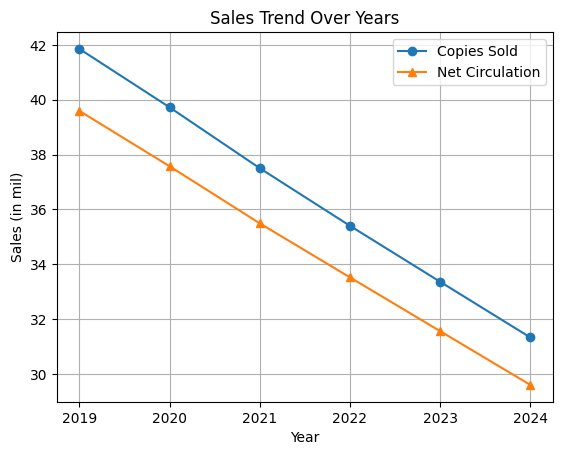

In [46]:
plt.plot(df_sales_trend["year"], df_sales_trend["copies_sold"], marker="o", label="Copies Sold")
plt.plot(df_sales_trend["year"], df_sales_trend["net_circulation"], marker="^", label="Net Circulation")

plt.xlabel("Year")
plt.ylabel("Sales (in mil)")
plt.title("Sales Trend Over Years")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df_city_sales = pd.merge(df_print_sales,df_city,on="city_id")

In [48]:
df_city_sales.head()

,edition_id,city_id,Language,State,Date,year,month,copies_sold,copies_returned,net_circulation,city,state,tier
0,ED1005,C005,Hindi,Rajasthan,2023-05-01,2023,5,404389,13510,390879,Jaipur,Rajasthan,Tier 2
1,ED1005,C005,Hindi,Rajasthan,2019-03-01,2019,3,492943,25024,467919,Jaipur,Rajasthan,Tier 2
2,ED1001,C001,Hindi,Uttar Pradesh,2023-07-01,2023,7,168893,12285,156608,Lucknow,Uttar Pradesh,Tier 2
3,ED1003,C003,Hindi,Madhya Pradesh,2023-07-01,2023,7,216540,10117,206423,Bhopal,Madhya Pradesh,Tier 2
4,ED1007,C007,Hindi,Jharkhand,2020-10-01,2020,10,234563,13048,221515,Ranchi,Jharkhand,Tier 3


In [49]:
df_sales_trend_city_wise = df_city_sales.groupby(["city","year"]).agg({
                    "copies_sold":lambda x: round(x.sum() / 1e6, 2), #instead of "sum", you give a function that first sums, then divides, then rounds.
                    "copies_returned":lambda x: round(x.sum() / 1e6, 2),
                    "net_circulation":lambda x: round(x.sum() / 1e6, 2)
}).reset_index()

In [50]:
df_sales_trend_city_wise.sample(10)

,city,year,copies_sold,copies_returned,net_circulation
24,Kanpur,2019,4.59,0.25,4.35
0,Ahmedabad,2019,3.85,0.23,3.62
3,Ahmedabad,2022,3.29,0.18,3.11
47,Patna,2024,2.38,0.13,2.25
6,Bhopal,2019,3.44,0.17,3.27
11,Bhopal,2024,2.57,0.15,2.42
9,Bhopal,2022,2.88,0.15,2.73
58,Varanasi,2023,4.69,0.23,4.46
32,Lucknow,2021,2.25,0.13,2.12
13,Delhi,2020,4.38,0.23,4.16


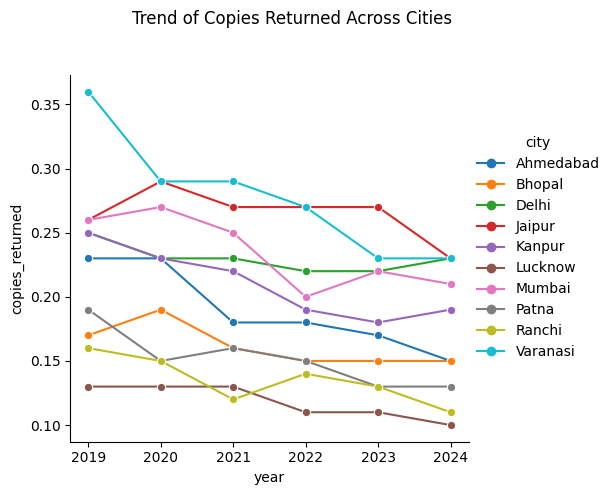

In [51]:


g = sns.relplot(
    data=df_sales_trend_city_wise,
    x="year", 
    y="copies_returned",   # ✅ pass column name as string
    hue="city",        # ✅ different colors for cities
    kind="line",
    marker="o"
)

g.set_titles("Copies Returned Trend")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Trend of Copies Returned Across Cities")
plt.show()

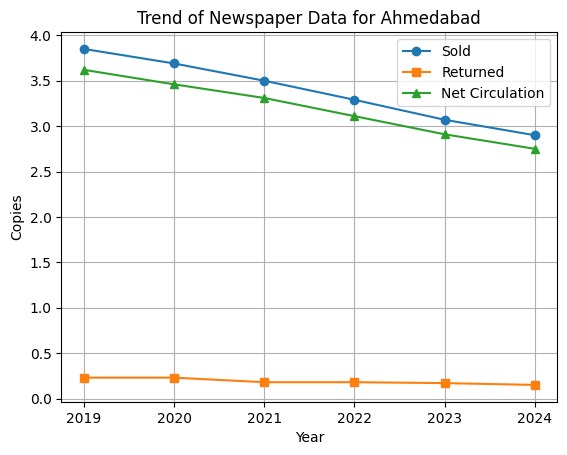

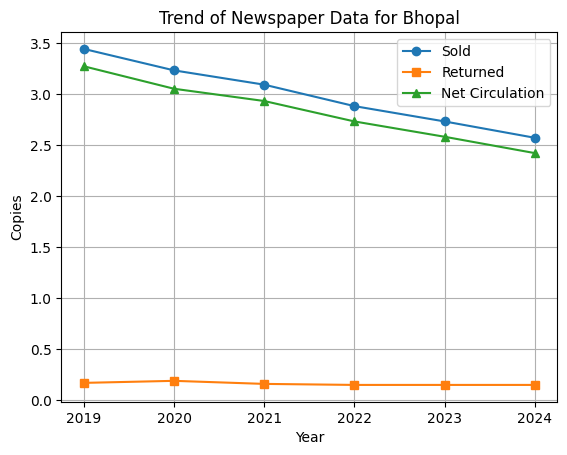

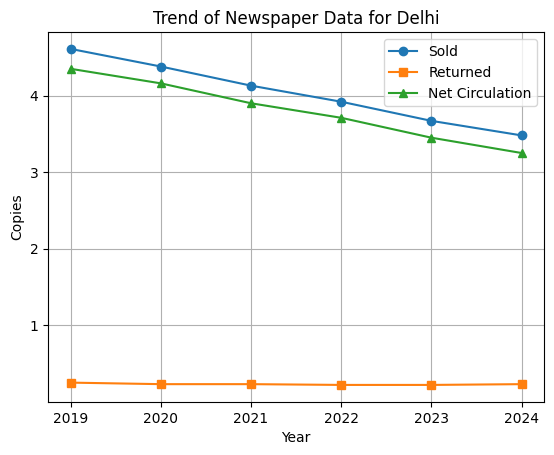

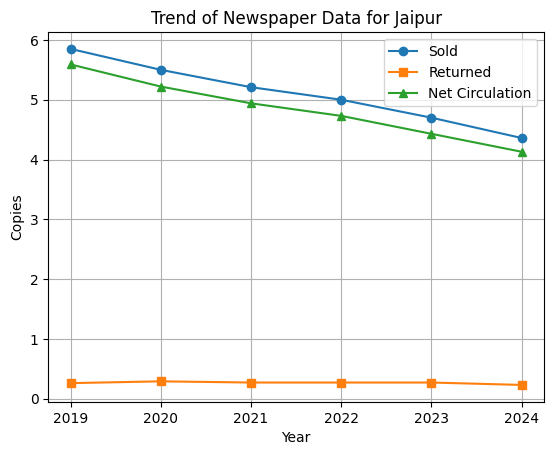

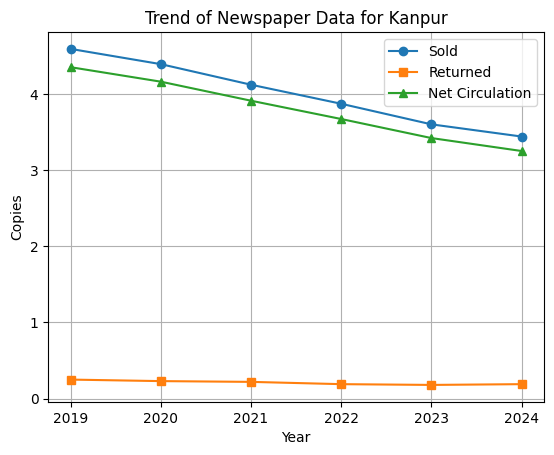

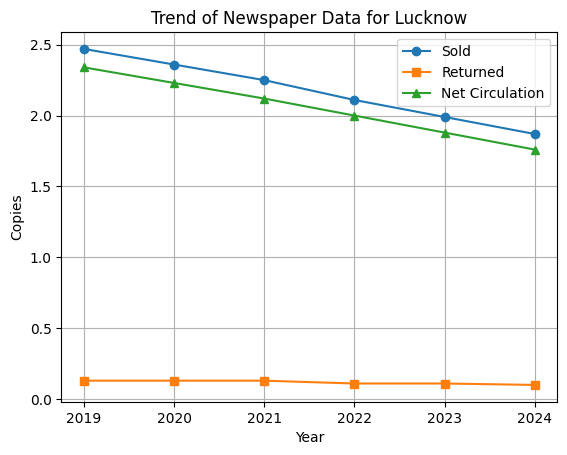

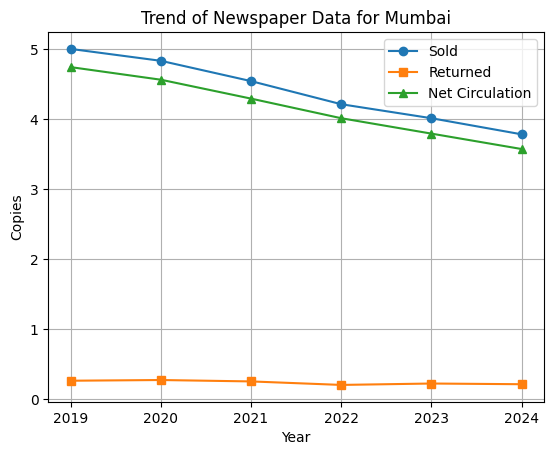

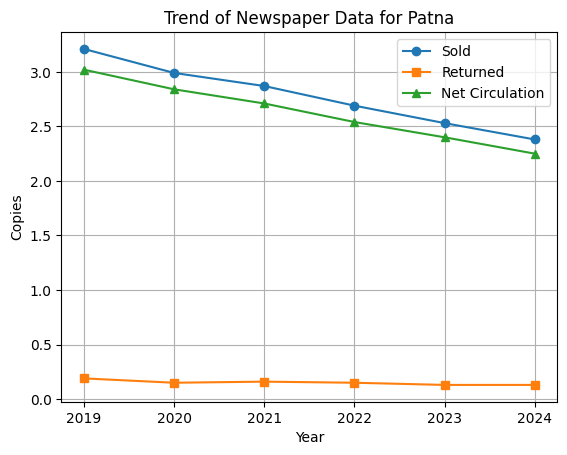

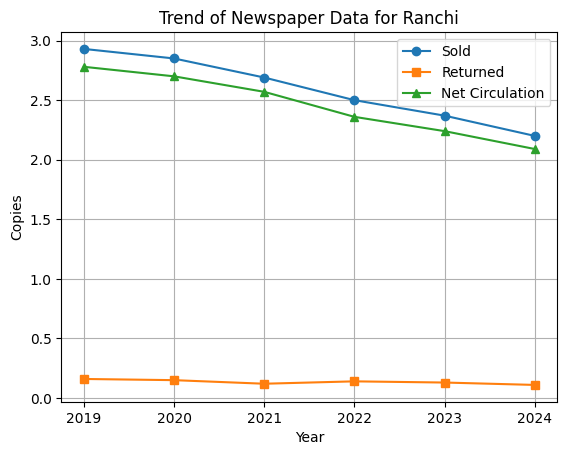

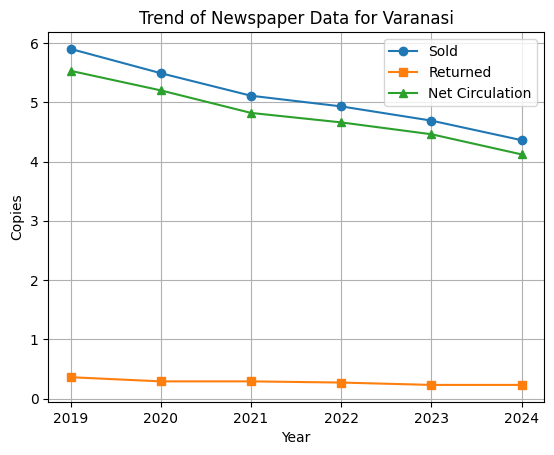

In [52]:

# Example: filter for one city
city_name = list(df_sales_trend_city_wise.city.unique())
for city in city_name:
    df_cities = df_sales_trend_city_wise[df_sales_trend_city_wise["city"] == city]
    
    plt.plot(df_cities["year"], df_cities["copies_sold"], marker="o", label="Sold")
    plt.plot(df_cities["year"], df_cities["copies_returned"], marker="s", label="Returned")
    plt.plot(df_cities["year"], df_cities["net_circulation"], marker="^", label="Net Circulation")
    
    plt.title(f"Trend of Newspaper Data for {city}")
    plt.xlabel("Year")
    plt.ylabel("Copies")
    plt.legend()
    plt.grid(True)
    plt.show()

In [53]:
# calculationg Year over Year change for different cities

df_sales_trend_city_wise["YoY_Sold"] = round(df_sales_trend_city_wise.groupby("city")["copies_sold"].pct_change() *100,2)
df_sales_trend_city_wise["YoY_Returned"] = round(df_sales_trend_city_wise.groupby("city")["copies_returned"].pct_change() *100,2)
df_sales_trend_city_wise["YoY_Circulation"] = round(df_sales_trend_city_wise.groupby("city")["net_circulation"].pct_change() *100,2)

In [54]:
# calculating the mean change over year
df_city_change_avg = df_sales_trend_city_wise.groupby("city").agg(
                                avg_yoy_sold = ("YoY_Sold","mean"),
                                avg_yoy_returned = ("YoY_Returned","mean"),
                                avg_yoy_circulation = ("YoY_Circulation","mean")
)
df_city_change_avg.reset_index()

,city,avg_yoy_sold,avg_yoy_returned,avg_yoy_circulation
0,Ahmedabad,-5.508,-7.812,-5.346
1,Bhopal,-5.660,-2.056,-5.836
2,Delhi,-5.468,-1.560,-5.660
3,Jaipur,-5.702,-2.034,-5.868
4,Kanpur,-5.600,-5.138,-5.660
5,Lucknow,-5.410,-4.894,-5.534
6,Mumbai,-5.432,-3.622,-5.508
7,Patna,-5.802,-6.792,-5.714
8,Ranchi,-5.554,-6.420,-5.528
9,Varanasi,-5.860,-8.230,-5.702


**2. To Performing Cities 
Which cities contributed the highest to net circulation and copies sold in 2024? 
Are these cities still profitable to operate in?**

In [55]:
df_city_sales_2024 = df_sales_trend_city_wise[df_sales_trend_city_wise['year'] == 2024].reset_index()

In [56]:
df_city_sales_2024.columns

Index(['index', 'city', 'year', 'copies_sold', 'copies_returned',
       'net_circulation', 'YoY_Sold', 'YoY_Returned', 'YoY_Circulation'],
      dtype='object')

In [57]:
new_order = ['city', 'year', 'copies_sold', 'net_circulation']
df_city_sales_2024 = df_city_sales_2024[new_order]
df_city_sales_2024

,city,year,copies_sold,net_circulation
0,Ahmedabad,2024,2.90,2.75
1,Bhopal,2024,2.57,2.42
2,Delhi,2024,3.48,3.25
3,Jaipur,2024,4.36,4.13
4,Kanpur,2024,3.44,3.25
5,Lucknow,2024,1.87,1.76
6,Mumbai,2024,3.78,3.57
7,Patna,2024,2.38,2.25
8,Ranchi,2024,2.20,2.09
9,Varanasi,2024,4.36,4.12


In [58]:
total_copies_sold = df_city_sales_2024.copies_sold.sum()
print(total_copies_sold)

31.34


In [59]:
total_net_circulation = round(df_city_sales_2024.net_circulation.sum(),2)
print(total_net_circulation)

29.59


In [60]:
df_city_sales_2024['Sold_Cont_Pct'] = round((df_city_sales_2024['copies_sold']/total_copies_sold)*100,2)
df_city_sales_2024['Circulation_Cont_Pct'] = round((df_city_sales_2024['net_circulation']/total_net_circulation)*100,2)

In [61]:
top_contributors = df_city_sales_2024.sort_values('Sold_Cont_Pct',ascending=False).reset_index(drop=True)
top_contributors

,city,year,copies_sold,net_circulation,Sold_Cont_Pct,Circulation_Cont_Pct
0,Varanasi,2024,4.36,4.12,13.91,13.92
1,Jaipur,2024,4.36,4.13,13.91,13.96
2,Mumbai,2024,3.78,3.57,12.06,12.06
3,Delhi,2024,3.48,3.25,11.10,10.98
4,Kanpur,2024,3.44,3.25,10.98,10.98
5,Ahmedabad,2024,2.90,2.75,9.25,9.29
6,Bhopal,2024,2.57,2.42,8.20,8.18
7,Patna,2024,2.38,2.25,7.59,7.60
8,Ranchi,2024,2.20,2.09,7.02,7.06
9,Lucknow,2024,1.87,1.76,5.97,5.95


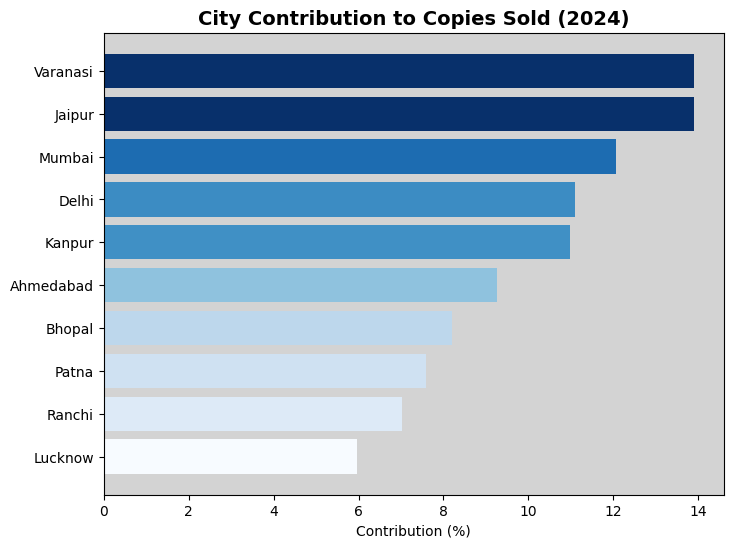

In [62]:
norm = plt.Normalize(top_contributors["Sold_Cont_Pct"].min(), top_contributors["Sold_Cont_Pct"].max())
colors = cm.Blues(norm(top_contributors["Sold_Cont_Pct"]))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("lightgray") 
ax.barh(top_contributors["city"], top_contributors["Sold_Cont_Pct"], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Contribution (%)")
ax.set_title("City Contribution to Copies Sold (2024)", fontsize=14, fontweight="bold")
plt.show()

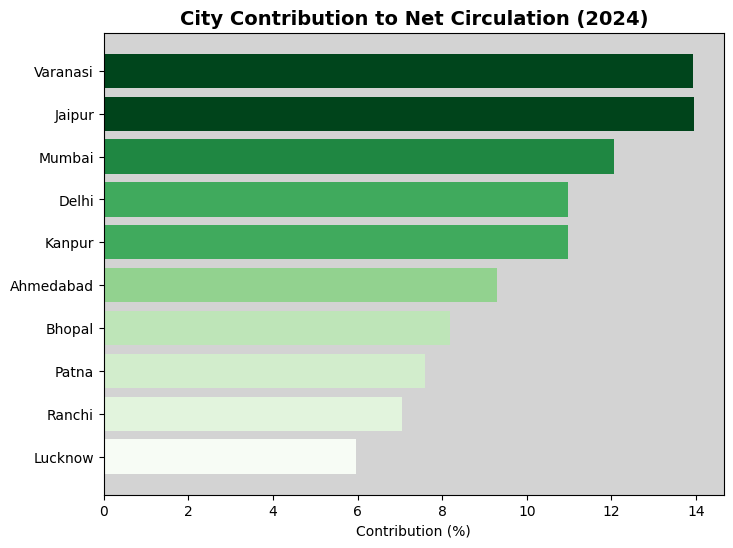

In [63]:
norm = plt.Normalize(top_contributors["Circulation_Cont_Pct"].min(), top_contributors["Circulation_Cont_Pct"].max())
colors = cm.Greens(norm(top_contributors["Circulation_Cont_Pct"]))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("lightgray") 
ax.barh(top_contributors["city"], top_contributors["Circulation_Cont_Pct"], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Contribution (%)")
ax.set_title("City Contribution to Net Circulation (2024)", fontsize=14, fontweight="bold")
plt.show()

**3. Print Waste Analysis 
Which cities have the largest gap between copies printed and net circulation, and 
how has that gap changed over time?**

In [64]:
df_sales_per_city = df_sales_trend_city_wise[['city', 'year', 'copies_sold', 'net_circulation']].copy()

In [65]:
df_sales_per_city_total = df_sales_per_city.groupby('city').agg(
                                             total_copies_sold = ('copies_sold','sum'),
                                            total_net_circulation = ('net_circulation', 'sum')
                                            ).reset_index()
df_sales_per_city_total

,city,total_copies_sold,total_net_circulation
0,Ahmedabad,20.30,19.16
1,Bhopal,17.94,16.98
2,Delhi,24.19,22.82
3,Jaipur,30.62,29.04
4,Kanpur,24.01,22.76
5,Lucknow,13.05,12.33
6,Mumbai,26.37,24.96
7,Patna,16.67,15.76
8,Ranchi,15.54,14.74
9,Varanasi,30.48,28.79


In [66]:
df_sales_per_city_total['gap'] = abs(df_sales_per_city_total['total_copies_sold'] - df_sales_per_city_total['total_net_circulation'])
df_sales_per_city_total

,city,total_copies_sold,total_net_circulation,gap
0,Ahmedabad,20.30,19.16,1.14
1,Bhopal,17.94,16.98,0.96
2,Delhi,24.19,22.82,1.37
3,Jaipur,30.62,29.04,1.58
4,Kanpur,24.01,22.76,1.25
5,Lucknow,13.05,12.33,0.72
6,Mumbai,26.37,24.96,1.41
7,Patna,16.67,15.76,0.91
8,Ranchi,15.54,14.74,0.80
9,Varanasi,30.48,28.79,1.69


In [67]:
df_sales_per_city_total = df_sales_per_city_total.sort_values('gap',ascending=False).reset_index(drop=True)

In [68]:
df_sales_per_city_total

,city,total_copies_sold,total_net_circulation,gap
0,Varanasi,30.48,28.79,1.69
1,Jaipur,30.62,29.04,1.58
2,Mumbai,26.37,24.96,1.41
3,Delhi,24.19,22.82,1.37
4,Kanpur,24.01,22.76,1.25
5,Ahmedabad,20.30,19.16,1.14
6,Bhopal,17.94,16.98,0.96
7,Patna,16.67,15.76,0.91
8,Ranchi,15.54,14.74,0.80
9,Lucknow,13.05,12.33,0.72


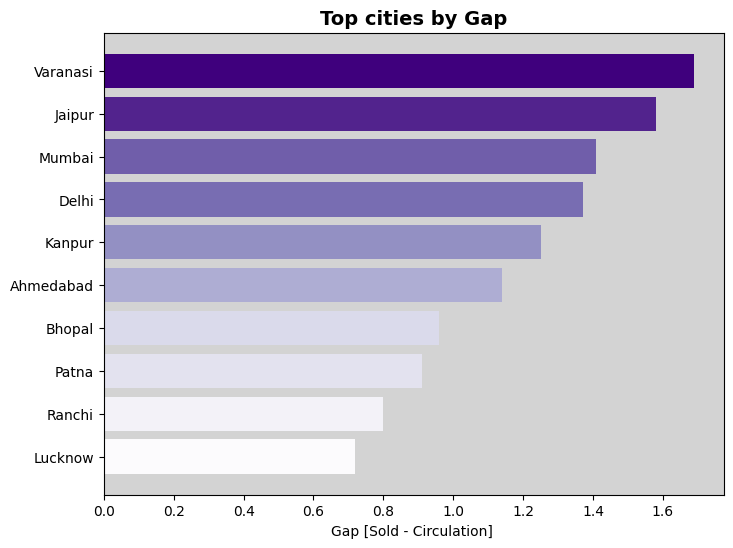

In [69]:
norm = plt.Normalize(df_sales_per_city_total['gap'].min(), df_sales_per_city_total['gap'].max())
colors = cm.Purples(norm(df_sales_per_city_total['gap']))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("lightgray") 
ax.barh(df_sales_per_city_total["city"], df_sales_per_city_total["gap"], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Gap [Sold - Circulation] ")
ax.set_title("Top cities by Gap", fontsize=14, fontweight="bold")
plt.show()

In [70]:
top_cities_by_gap = list(df_sales_per_city_total.city.unique())[:5]
top_cities_by_gap

['Varanasi', 'Jaipur', 'Mumbai', 'Delhi', 'Kanpur']

In [71]:
df_sales_per_city['gap'] = abs(df_sales_per_city['copies_sold'] - df_sales_per_city['net_circulation'])

In [72]:
top_cities_yoy_gap = df_sales_per_city[df_sales_per_city.city.isin(top_cities_by_gap)].reset_index(drop=True)

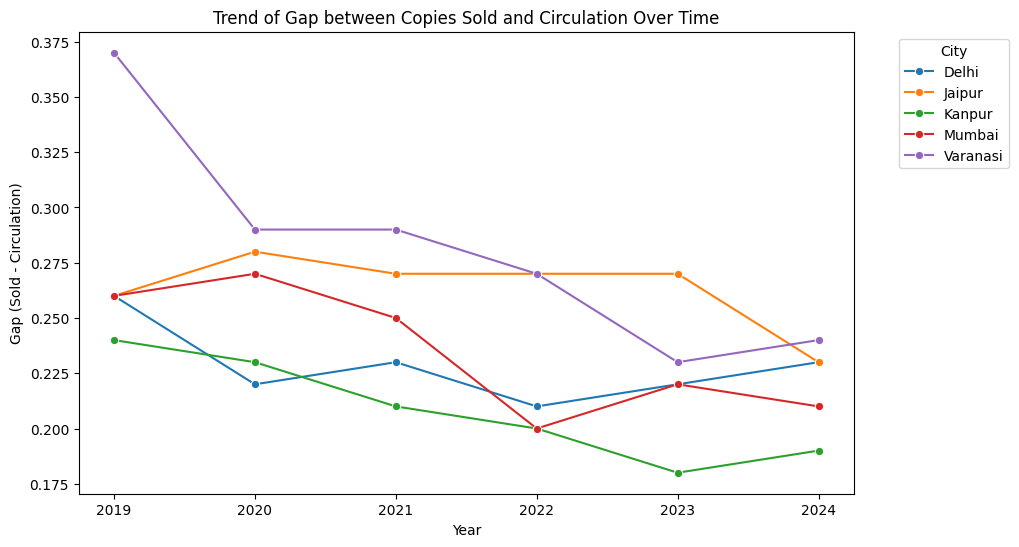

In [73]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=top_cities_yoy_gap, x="year", y="gap", hue="city", marker="o")

plt.xlabel("Year")
plt.ylabel("Gap (Sold - Circulation)")
plt.title("Trend of Gap between Copies Sold and Circulation Over Time")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend outside
plt.show()

In [74]:
top_cities_yoy_gap['change_pct'] = abs(round(top_cities_yoy_gap.groupby('city').gap.pct_change()*100,2))
top_cities_yoy_gap.groupby('city').change_pct.mean().sort_values(ascending=False).reset_index()

,city,change_pct
0,Varanasi,9.536
1,Mumbai,9.162
2,Delhi,7.588
3,Kanpur,6.638
4,Jaipur,5.214


**4. Ad Revenue Trends by Category 
How has ad revenue evolved across different ad categories between 2019 and 
2024? Which categories have remained strong, and which have declined?**

In [75]:
df_ad_rev_cat = pd.merge(df_ad_rev, df_ad_category, on = "ad_category_id")
df_ad_rev_cat.head()

,edition_id,city_id,ad_category_id,year,qtr,ad_revenue,currency,ad_rev_inr,comments,standard_ad_category,category_group,example_brands
0,ED1005,C005,A001,2023,Q2,22613.69,EUR,2261369.0,NaN,Government,Public Sector,"LIC, SBI"
1,ED1005,C005,A002,2019,Q1,39366.88,USD,3543019.2,NaN,FMCG,Commercial Brands,"HUL, Britannia"
2,ED1001,C001,A003,2023,Q3,3709860.00,INR,3709860.0,NaN,Real Estate,Private Sector,"DLF, Lodha"
3,ED1003,C003,A002,2023,Q3,40969.55,USD,3687259.5,NaN,FMCG,Commercial Brands,"HUL, Britannia"
4,ED1007,C007,A003,2020,Q4,51779.40,USD,4660146.0,NaN,Real Estate,Private Sector,"DLF, Lodha"


In [76]:
df_ad_rev_cat.rename(columns={'standard_ad_category': 'ad_category'}, inplace = True)

In [77]:
df_ad_rev_cat.head()

,edition_id,city_id,ad_category_id,year,qtr,ad_revenue,currency,ad_rev_inr,comments,ad_category,category_group,example_brands
0,ED1005,C005,A001,2023,Q2,22613.69,EUR,2261369.0,NaN,Government,Public Sector,"LIC, SBI"
1,ED1005,C005,A002,2019,Q1,39366.88,USD,3543019.2,NaN,FMCG,Commercial Brands,"HUL, Britannia"
2,ED1001,C001,A003,2023,Q3,3709860.00,INR,3709860.0,NaN,Real Estate,Private Sector,"DLF, Lodha"
3,ED1003,C003,A002,2023,Q3,40969.55,USD,3687259.5,NaN,FMCG,Commercial Brands,"HUL, Britannia"
4,ED1007,C007,A003,2020,Q4,51779.40,USD,4660146.0,NaN,Real Estate,Private Sector,"DLF, Lodha"


In [78]:
df_ad_rev_trend = df_ad_rev_cat.groupby(['ad_category', 'year']).agg(
                                        ad_rev_cr = ('ad_rev_inr', lambda x: round(x.sum()/1e6,2))
                                                    ).reset_index()

In [79]:
df_ad_rev_trend['change_pct'] = round(df_ad_rev_trend.groupby('ad_category').ad_rev_cr.pct_change()*100,2)
df_ad_rev_trend.head()

,ad_category,year,ad_rev_cr,change_pct
0,Automobile,2019,63.22,NaN
1,Automobile,2020,92.72,46.66
2,Automobile,2021,59.83,-35.47
3,Automobile,2022,68.15,13.91
4,Automobile,2023,67.69,-0.67


In [80]:
df_ad_rev_trend.ad_rev_cr.sum()

np.float64(2214.91)

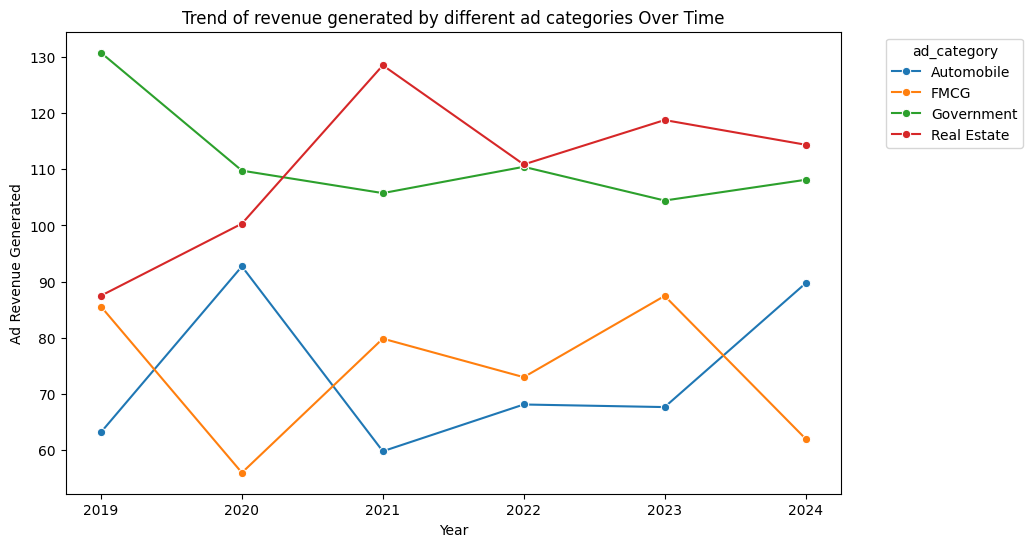

In [81]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ad_rev_trend, x="year", y="ad_rev_cr", hue="ad_category", marker="o")

plt.xlabel("Year")
plt.ylabel("Ad Revenue Generated")
plt.title("Trend of revenue generated by different ad categories Over Time")
plt.legend(title="ad_category", bbox_to_anchor=(1.05, 1), loc="upper left")  # move legend outside
plt.show()

In [82]:
df_pivot = df_ad_rev_trend.pivot(index="ad_category", columns="year", values="change_pct")
df_pivot = df_pivot.reset_index() # Optional: makes ad_category a column again
df_pivot = df_pivot.drop(columns=['2019'])
df_pivot

year,ad_category,2020,2021,2022,2023,2024
0,Automobile,46.66,-35.47,13.91,-0.67,32.53
1,FMCG,-34.54,42.60,-8.59,19.81,-29.05
2,Government,-16.05,-3.64,4.43,-5.43,3.53
3,Real Estate,14.65,28.08,-13.73,7.13,-3.70


**5. City-Level Ad Revenue Performance 
Which cities generated the most ad revenue, and how does that correlate with 
their print circulation?**

In [83]:
df_city_rev = pd.merge(df_ad_rev,df_city,on='city_id')

df_city_rev.head()

,edition_id,city_id,ad_category_id,year,qtr,ad_revenue,currency,ad_rev_inr,comments,city,state,tier
0,ED1005,C005,A001,2023,Q2,22613.69,EUR,2261369.0,NaN,Jaipur,Rajasthan,Tier 2
1,ED1005,C005,A002,2019,Q1,39366.88,USD,3543019.2,NaN,Jaipur,Rajasthan,Tier 2
2,ED1001,C001,A003,2023,Q3,3709860.00,INR,3709860.0,NaN,Lucknow,Uttar Pradesh,Tier 2
3,ED1003,C003,A002,2023,Q3,40969.55,USD,3687259.5,NaN,Bhopal,Madhya Pradesh,Tier 2
4,ED1007,C007,A003,2020,Q4,51779.40,USD,4660146.0,NaN,Ranchi,Jharkhand,Tier 3


In [84]:
df_city_revenue = round(df_city_rev.groupby('city').ad_rev_inr.sum()/1e6,2).reset_index()
df_city_revenue

,city,ad_rev_inr
0,Ahmedabad,222.04
1,Bhopal,234.66
2,Delhi,218.02
3,Jaipur,228.92
4,Kanpur,202.65
5,Lucknow,223.07
6,Mumbai,228.43
7,Patna,236.25
8,Ranchi,216.54
9,Varanasi,204.33


In [85]:
# Cities that generated the highest revenue

top_city_rev = df_city_revenue.sort_values('ad_rev_inr',ascending=False).reset_index(drop=True)
top_city_rev = top_city_rev[:5]
top_city_rev

,city,ad_rev_inr
0,Patna,236.25
1,Bhopal,234.66
2,Jaipur,228.92
3,Mumbai,228.43
4,Lucknow,223.07


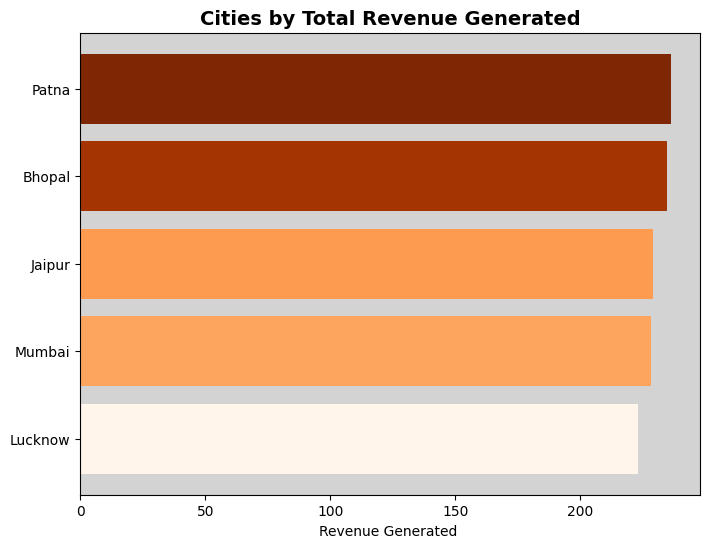

In [86]:
norm = plt.Normalize(top_city_rev['ad_rev_inr'].min(), top_city_rev['ad_rev_inr'].max())
colors = cm.Oranges(norm(top_city_rev['ad_rev_inr']))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("lightgray") 
ax.barh(top_city_rev["city"], top_city_rev['ad_rev_inr'], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Revenue Generated ")
ax.set_title("Cities by Total Revenue Generated", fontsize=14, fontweight="bold")
plt.show()

In [87]:
df_city_circulation = round(df_city_sales.groupby('city').net_circulation.sum()/1e6,2).reset_index()
df_city_circulation

,city,net_circulation
0,Ahmedabad,19.16
1,Bhopal,16.97
2,Delhi,22.82
3,Jaipur,29.03
4,Kanpur,22.76
5,Lucknow,12.33
6,Mumbai,24.96
7,Patna,15.75
8,Ranchi,14.74
9,Varanasi,28.80


In [88]:
df_city_rev_sales = pd.merge(df_city_revenue,df_city_circulation,on='city').reset_index(drop=True)
top_cities_circulation = df_city_rev_sales.sort_values('ad_rev_inr',ascending=False).reset_index(drop=True)[:5]
top_cities_circulation

,city,ad_rev_inr,net_circulation
0,Patna,236.25,15.75
1,Bhopal,234.66,16.97
2,Jaipur,228.92,29.03
3,Mumbai,228.43,24.96
4,Lucknow,223.07,12.33


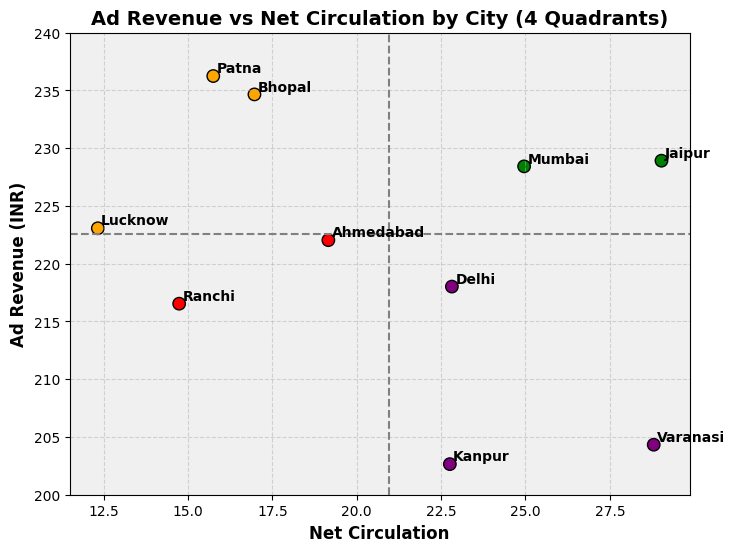

In [89]:
import matplotlib.pyplot as plt

# Define midpoints to divide quadrants
x_mid = df_city_rev_sales["net_circulation"].median()
y_mid = df_city_rev_sales["ad_rev_inr"].median()

# Assign colors based on quadrant
colors = []
for i in range(len(df_city_rev_sales)):
    x = df_city_rev_sales["net_circulation"][i]
    y = df_city_rev_sales["ad_rev_inr"][i]

    if x >= x_mid and y >= y_mid:
        colors.append("green")    # Top-right quadrant
    elif x < x_mid and y >= y_mid:
        colors.append("orange")   # Top-left quadrant
    elif x < x_mid and y < y_mid:
        colors.append("red")      # Bottom-left quadrant
    else:
        colors.append("purple")   # Bottom-right quadrant

# Plot scatter with custom background
plt.figure(figsize=(8,6))
plt.gca().set_facecolor("#f0f0f0")  # light gray background

# Scatter points
plt.scatter(df_city_rev_sales["net_circulation"], 
            df_city_rev_sales["ad_rev_inr"], 
            c=colors, s=80, edgecolor="black")

# Add dividing lines for quadrants
plt.axvline(x=x_mid, color='gray', linestyle='--')
plt.axhline(y=y_mid, color='gray', linestyle='--')

# Add bold and large city labels
for i, city in enumerate(df_city_rev_sales["city"]):
    plt.text(df_city_rev_sales["net_circulation"][i] + 0.1,   # small shift for clarity
             df_city_rev_sales["ad_rev_inr"][i] + 0.3,
             city,
             fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Net Circulation", fontsize=12, fontweight='bold')
plt.ylabel("Ad Revenue (INR)", fontsize=12, fontweight='bold')
plt.title("Ad Revenue vs Net Circulation by City (4 Quadrants)", fontsize=14, fontweight='bold')

# Limits and margins
plt.ylim(200, 240)
plt.margins(y=0.2)

# Optional grid for clarity
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


**6. Digital Readiness vs. Performance
Which cities show high digital readiness (based on smartphone, internet, and 
literacy rates) but had low digital pilot engagement?**

In [90]:
df_city_readiness.head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration
0,C001,2019,Q1,89.16,75.76,56.53
1,C001,2019,Q2,88.76,76.45,55.97
2,C001,2019,Q3,88.83,75.32,56.52
3,C001,2019,Q4,89.25,75.83,56.94
4,C001,2020,Q1,89.13,75.03,56.45


In [91]:
df_city.head()

,city_id,city,state,tier
0,C001,Lucknow,Uttar Pradesh,Tier 2
1,C002,Delhi,Delhi,Tier 1
2,C003,Bhopal,Madhya Pradesh,Tier 2
3,C004,Patna,Bihar,Tier 2
4,C005,Jaipur,Rajasthan,Tier 2


In [92]:
df_readiness_with_city = pd.merge(df_city_readiness, df_city, on = 'city_id').reset_index(drop=True)
df_readiness_with_city.head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration,city,state,tier
0,C001,2019,Q1,89.16,75.76,56.53,Lucknow,Uttar Pradesh,Tier 2
1,C001,2019,Q2,88.76,76.45,55.97,Lucknow,Uttar Pradesh,Tier 2
2,C001,2019,Q3,88.83,75.32,56.52,Lucknow,Uttar Pradesh,Tier 2
3,C001,2019,Q4,89.25,75.83,56.94,Lucknow,Uttar Pradesh,Tier 2
4,C001,2020,Q1,89.13,75.03,56.45,Lucknow,Uttar Pradesh,Tier 2


**The reported internet penetration for Jaipur (10%) appeared unusually low given its literacy rate(85%) , smartphone_penetration(70%) and city tier. To mitigate the impact of this potential outlier, Jaipur’s value was replaced with the median internet penetration of all tier 2 cities. This ensures the analysis reflects more realistic connectivity levels without skewing results.**

In [93]:
df_readiness_with_city[df_readiness_with_city.city == 'Jaipur'].head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration,city,state,tier
96,C005,2019,Q1,84.85,70.31,10.0,Jaipur,Rajasthan,Tier 2
97,C005,2019,Q2,84.98,71.51,10.0,Jaipur,Rajasthan,Tier 2
98,C005,2019,Q3,84.82,70.88,10.0,Jaipur,Rajasthan,Tier 2
99,C005,2019,Q4,85.01,69.97,10.0,Jaipur,Rajasthan,Tier 2
100,C005,2020,Q1,84.70,71.11,10.0,Jaipur,Rajasthan,Tier 2


In [94]:
median_value = round(df_readiness_with_city[
                    (df_readiness_with_city.tier=='Tier 2') & 
                    (df_readiness_with_city.city != "Jaipur")].internet_penetration.median(),2)

df_readiness_with_city.loc[df_readiness_with_city.city == "Jaipur", "internet_penetration"] = median_value

df_readiness_with_city[df_readiness_with_city.city == 'Jaipur'].head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration,city,state,tier
96,C005,2019,Q1,84.85,70.31,67.78,Jaipur,Rajasthan,Tier 2
97,C005,2019,Q2,84.98,71.51,67.78,Jaipur,Rajasthan,Tier 2
98,C005,2019,Q3,84.82,70.88,67.78,Jaipur,Rajasthan,Tier 2
99,C005,2019,Q4,85.01,69.97,67.78,Jaipur,Rajasthan,Tier 2
100,C005,2020,Q1,84.70,71.11,67.78,Jaipur,Rajasthan,Tier 2


In [95]:
# Calculating digital readiness score as average of smartphone, internet, and literacy rates
df_readiness_with_city["readiness_score"] = round((df_readiness_with_city['smartphone_penetration'] + 
                                             df_readiness_with_city['internet_penetration'] + 
                                             df_readiness_with_city['literacy_rate'])/3,2)

In [96]:
df_readiness_with_city.head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration,city,state,tier,readiness_score
0,C001,2019,Q1,89.16,75.76,56.53,Lucknow,Uttar Pradesh,Tier 2,73.82
1,C001,2019,Q2,88.76,76.45,55.97,Lucknow,Uttar Pradesh,Tier 2,73.73
2,C001,2019,Q3,88.83,75.32,56.52,Lucknow,Uttar Pradesh,Tier 2,73.56
3,C001,2019,Q4,89.25,75.83,56.94,Lucknow,Uttar Pradesh,Tier 2,74.01
4,C001,2020,Q1,89.13,75.03,56.45,Lucknow,Uttar Pradesh,Tier 2,73.54


In [97]:
df_readiness = round(df_readiness_with_city.groupby("city").readiness_score.mean().reset_index(),2)
df_readiness.sort_values("readiness_score",ascending=False).reset_index(drop=True)

,city,readiness_score
0,Kanpur,75.10
1,Jaipur,74.28
2,Varanasi,74.18
3,Lucknow,73.49
4,Bhopal,73.29
5,Ahmedabad,72.73
6,Patna,70.53
7,Ranchi,68.64
8,Mumbai,68.33
9,Delhi,56.05


In [98]:
df_pilot = df_digi_pilot.copy()

In [99]:
df_pilot.head()

,platform,city_id,launch_month,month_num,month_name,ad_category_id,dev_cost,marketing_cost,users_reached,downloads_or_accesses,avg_bounce_rate,cumulative_feedback_from_customers
0,PDF WhatsApp Push,C001,2021-01,1,January,A001,236570,66060,23509,16319,52.55,"Mixed feedback: some usability concerns, but h..."
1,PDF WhatsApp Push,C002,2021-02,2,February,A001,156865,99122,19472,17017,82.53,"Mixed feedback: some usability concerns, but h..."
2,PDF WhatsApp Push,C003,2021-03,3,March,A001,242728,46087,8471,2891,68.06,"Mixed feedback: some usability concerns, but h..."
3,PDF WhatsApp Push,C004,2021-04,4,April,A001,147695,78868,46796,15640,66.17,"Mixed feedback: some usability concerns, but h..."
4,PDF WhatsApp Push,C005,2021-05,5,May,A001,325906,135644,16805,3231,76.90,The site takes too long to load on average pho...


**users_reached** → Users exposed to your campaigns (potential audience).

**downloads_or_accesses** → Users who actually opened/accessed the app or pilot content (shows interest and initial engagement).

**avg_bounce_rate** → % of users who quickly exited after opening (shows lack of deeper engagement).

_________________________________________________________________________________________________________________________________

Downloads/Accesses alone

Shows the conversion from reach → actual interaction.

**Bounce-adjusted engagement**

Since some users quickly exit, we can adjust:

**Effective Engaged Users=downloads_or_accesses×((100−avg_bounce_rate)/100))**

This estimates the users who actually spent time engaging rather than leaving immediately.

In [100]:
# users count who either downloaded or accessed
users_interacted = df_pilot['downloads_or_accesses']
bounce_rate = df_pilot['avg_bounce_rate']
df_pilot["eff_engagement_rate"] = (users_interacted * ((100 - bounce_rate)/100)/users_interacted)*100

In [101]:
df_engagement = df_pilot.groupby("city_id").eff_engagement_rate.mean()

In [102]:
df_engagement.reset_index()

,city_id,eff_engagement_rate
0,C001,37.2160
1,C002,39.1920
2,C003,38.1900
3,C004,36.1460
4,C005,30.5480
5,C006,36.5100
6,C007,32.1340
7,C008,27.2020
8,C009,39.1475
9,C010,25.2225


In [103]:
df_readiness_engagement = pd.merge(df_readiness_with_city, df_engagement, on='city_id')
df_readiness_engagement.head()

,city_id,year,qtr,literacy_rate,smartphone_penetration,internet_penetration,city,state,tier,readiness_score,eff_engagement_rate
0,C001,2019,Q1,89.16,75.76,56.53,Lucknow,Uttar Pradesh,Tier 2,73.82,37.216
1,C001,2019,Q2,88.76,76.45,55.97,Lucknow,Uttar Pradesh,Tier 2,73.73,37.216
2,C001,2019,Q3,88.83,75.32,56.52,Lucknow,Uttar Pradesh,Tier 2,73.56,37.216
3,C001,2019,Q4,89.25,75.83,56.94,Lucknow,Uttar Pradesh,Tier 2,74.01,37.216
4,C001,2020,Q1,89.13,75.03,56.45,Lucknow,Uttar Pradesh,Tier 2,73.54,37.216


In [104]:
df_readiness_engagement = df_readiness_engagement.groupby("city").agg({
                            "readiness_score":"mean",
                            "eff_engagement_rate":"mean"
})

In [105]:
df_readiness_engagement = df_readiness_engagement.sort_values("readiness_score").reset_index()

In [106]:
df_readiness_engagement

,city,readiness_score,eff_engagement_rate
0,Delhi,56.047500,39.1920
1,Mumbai,68.325833,36.5100
2,Ranchi,68.638750,32.1340
3,Patna,70.526250,36.1460
4,Ahmedabad,72.734583,39.1475
5,Bhopal,73.287500,38.1900
6,Lucknow,73.494583,37.2160
7,Varanasi,74.178333,25.2225
8,Jaipur,74.276250,30.5480
9,Kanpur,75.099583,27.2020


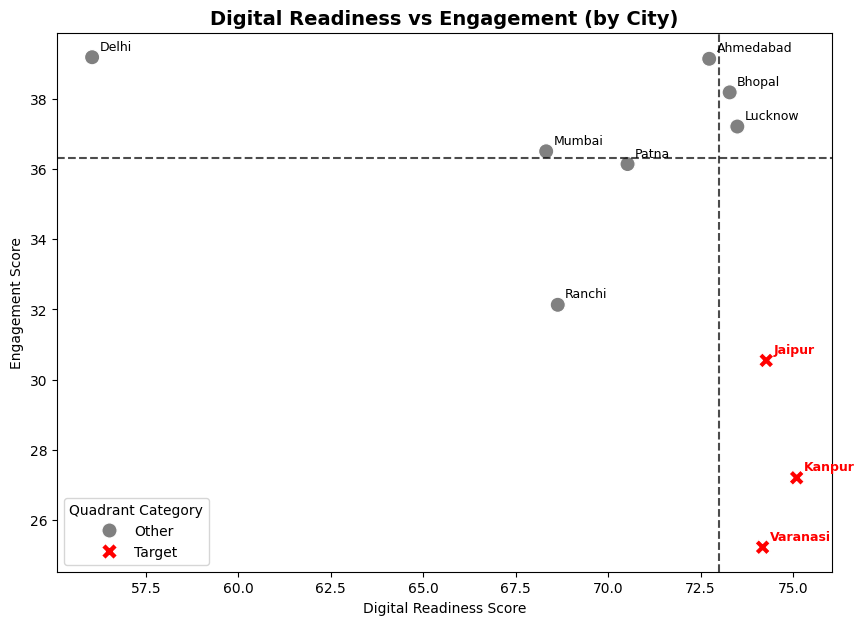

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute medians for quadrant split
readiness_median = df_readiness_engagement["readiness_score"].median()
engagement_median = df_readiness_engagement["eff_engagement_rate"].median()

# Identify target quadrant (High readiness, Low engagement)
df_readiness_engagement["highlight"] = df_readiness_engagement.apply(
    lambda row: "Target" if row["readiness_score"] > readiness_median and row["eff_engagement_rate"] < engagement_median else "Other",
    axis=1
)

# Plot
plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=df_readiness_engagement, 
    x="readiness_score", 
    y="eff_engagement_rate",
    hue="highlight", 
    style="highlight", 
    s=120, 
    palette={"Target":"red", "Other":"gray"}
)

# Add quadrant lines
plt.axvline(readiness_median, color="black", linestyle="--", alpha=0.7)
plt.axhline(engagement_median, color="black", linestyle="--", alpha=0.7)

# Annotate all cities
for _, row in df_readiness_engagement.iterrows():
    if row["highlight"] == "Target":
        color = "red"
        weight = "bold"
    else:
        color = "black"
        weight = "normal"
    ax.text(
        row["readiness_score"] + 0.2,   # slight shift to avoid overlap with marker
        row["eff_engagement_rate"] + 0.2,
        row["city"],
        color=color,
        weight=weight,
        fontsize=9
    )

# Titles and labels
plt.title("Digital Readiness vs Engagement (by City)", fontsize=14, weight="bold")
plt.xlabel("Digital Readiness Score")
plt.ylabel("Engagement Score")
plt.legend(title="Quadrant Category")

plt.show()


In [108]:
df_readiness_engagement[(df_readiness_engagement.readiness_score>readiness_median) & (df_readiness_engagement.eff_engagement_rate<engagement_median)]

,city,readiness_score,eff_engagement_rate,highlight
7,Varanasi,74.178333,25.2225,Target
8,Jaipur,74.276250,30.5480,Target
9,Kanpur,75.099583,27.2020,Target


**7. Ad Revenue vs. Circulation ROI : Which cities had the highest ad revenue per net circulated copy? Is this ratio 
improving or worsening over time?**

In [109]:
df_city_rev.head()

,edition_id,city_id,ad_category_id,year,qtr,ad_revenue,currency,ad_rev_inr,comments,city,state,tier
0,ED1005,C005,A001,2023,Q2,22613.69,EUR,2261369.0,NaN,Jaipur,Rajasthan,Tier 2
1,ED1005,C005,A002,2019,Q1,39366.88,USD,3543019.2,NaN,Jaipur,Rajasthan,Tier 2
2,ED1001,C001,A003,2023,Q3,3709860.00,INR,3709860.0,NaN,Lucknow,Uttar Pradesh,Tier 2
3,ED1003,C003,A002,2023,Q3,40969.55,USD,3687259.5,NaN,Bhopal,Madhya Pradesh,Tier 2
4,ED1007,C007,A003,2020,Q4,51779.40,USD,4660146.0,NaN,Ranchi,Jharkhand,Tier 3


In [110]:
df_city_sales.head()

,edition_id,city_id,Language,State,Date,year,month,copies_sold,copies_returned,net_circulation,city,state,tier
0,ED1005,C005,Hindi,Rajasthan,2023-05-01,2023,5,404389,13510,390879,Jaipur,Rajasthan,Tier 2
1,ED1005,C005,Hindi,Rajasthan,2019-03-01,2019,3,492943,25024,467919,Jaipur,Rajasthan,Tier 2
2,ED1001,C001,Hindi,Uttar Pradesh,2023-07-01,2023,7,168893,12285,156608,Lucknow,Uttar Pradesh,Tier 2
3,ED1003,C003,Hindi,Madhya Pradesh,2023-07-01,2023,7,216540,10117,206423,Bhopal,Madhya Pradesh,Tier 2
4,ED1007,C007,Hindi,Jharkhand,2020-10-01,2020,10,234563,13048,221515,Ranchi,Jharkhand,Tier 3


In [111]:
df_ad_rev_city = df_city_rev.groupby(['city','year']).ad_rev_inr.sum().reset_index()

In [112]:
df_ad_rev_city.sample(5)

,city,year,ad_rev_inr
47,Patna,2024,48610626.3
54,Varanasi,2019,26821297.5
13,Delhi,2020,35200159.1
38,Mumbai,2021,36988398.9
51,Ranchi,2022,37726481.2


In [113]:
df_circulation_city = df_city_sales.groupby(['city','year']).net_circulation.sum().reset_index()

In [114]:
df_circulation_city.sample(5)

,city,year,net_circulation
42,Patna,2019,3020231
25,Kanpur,2020,4163238
7,Bhopal,2020,3047725
37,Mumbai,2020,4560074
6,Bhopal,2019,3268206


In [115]:
# Convert 'year' column in df_ad_rev_city to the correct type for merging
df_ad_rev_city['year'] = df_ad_rev_city['year'].astype("int32")

In [116]:
df_ad_rev_circulation_city = pd.merge(df_ad_rev_city,df_circulation_city,on = ['city','year'])

In [117]:
df_ad_rev_circulation_city.head(12)

,city,year,ad_rev_inr,net_circulation
0,Ahmedabad,2019,38507637.7,3624541
1,Ahmedabad,2020,38189195.6,3455134
2,Ahmedabad,2021,33479359.9,3314195
3,Ahmedabad,2022,44161475.8,3109889
4,Ahmedabad,2023,32124347.4,2905303
5,Ahmedabad,2024,35577704.5,2746691
6,Bhopal,2019,39310050.0,3268206
7,Bhopal,2020,33964741.3,3047725
8,Bhopal,2021,40191332.8,2925205
9,Bhopal,2022,42632826.9,2731598


In [118]:
df_ad_rev_circulation_city['rev_per_copy'] = round(df_ad_rev_circulation_city.ad_rev_inr/df_ad_rev_circulation_city.net_circulation,2)

In [119]:
df_ad_rev_circulation_city.head()

,city,year,ad_rev_inr,net_circulation,rev_per_copy
0,Ahmedabad,2019,38507637.7,3624541,10.62
1,Ahmedabad,2020,38189195.6,3455134,11.05
2,Ahmedabad,2021,33479359.9,3314195,10.10
3,Ahmedabad,2022,44161475.8,3109889,14.20
4,Ahmedabad,2023,32124347.4,2905303,11.06


In [120]:
top_cities_rev_per_copy = df_ad_rev_circulation_city.groupby('city').rev_per_copy.mean().sort_values(ascending=False).reset_index()[:3]

top_cities_rev_per_copy['rev_per_copy'] = round(top_cities_rev_per_copy['rev_per_copy'],2)

top_cities_rev_per_copy

,city,rev_per_copy
0,Lucknow,18.33
1,Patna,15.29
2,Ranchi,14.83


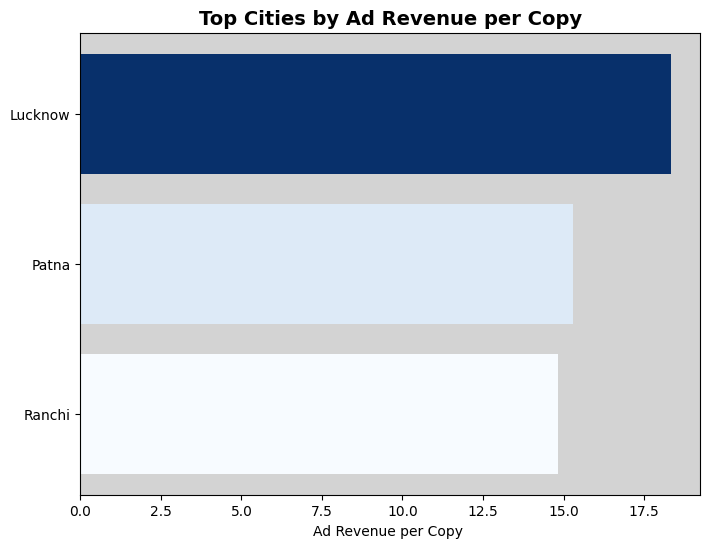

In [121]:
norm = plt.Normalize(top_cities_rev_per_copy['rev_per_copy'].min(), top_cities_rev_per_copy['rev_per_copy'].max())
colors = cm.Blues(norm(top_cities_rev_per_copy['rev_per_copy']))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor("lightgray") 
ax.barh(top_cities_rev_per_copy["city"], top_cities_rev_per_copy['rev_per_copy'], color=colors)
ax.invert_yaxis()
ax.set_xlabel("Ad Revenue per Copy ")
ax.set_title("Top Cities by Ad Revenue per Copy", fontsize=14, fontweight="bold")
plt.show()

In [122]:
top_cities_rev_per_copy_yoy = df_ad_rev_circulation_city[df_ad_rev_circulation_city.city.isin(top_cities_rev_per_copy.city.unique())].reset_index(drop=True)

In [123]:
top_cities_rev_per_copy_yoy.head()

,city,year,ad_rev_inr,net_circulation,rev_per_copy
0,Lucknow,2019,38044615.4,2336155,16.29
1,Lucknow,2020,32820036.0,2234098,14.69
2,Lucknow,2021,39013174.0,2115877,18.44
3,Lucknow,2022,33702046.0,2003659,16.82
4,Lucknow,2023,37771199.0,1880340,20.09


In [124]:
# Pivot data for line plotting
df_pivot = top_cities_rev_per_copy_yoy.pivot(index="year", columns="city", values="rev_per_copy")

df_pivot

city,Lucknow,Patna,Ranchi
year,,,
2019,16.29,13.36,14.34
2020,14.69,11.32,13.57
2021,18.44,13.74,12.71
2022,16.82,13.63,15.97
2023,20.09,18.09,12.83
2024,23.66,21.58,19.58


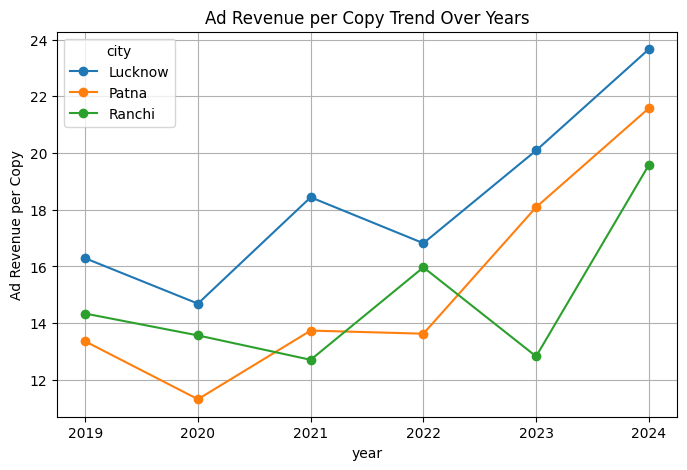

In [125]:
# plot
df_pivot.plot(marker='o', figsize=(8,5))
plt.ylabel("Ad Revenue per Copy")
plt.title("Ad Revenue per Copy Trend Over Years")
plt.grid(True)
plt.show()

**8. Digital Relaunch City Prioritization:
Based on digital readiness, pilot engagement, and print decline, which 3 cities should be 
prioritized for Phase 1 of the digital relaunch?**

In [126]:
df_readiness_engagement = df_readiness_engagement.drop(columns='highlight')
df_readiness_engagement.head()

,city,readiness_score,eff_engagement_rate
0,Delhi,56.047500,39.1920
1,Mumbai,68.325833,36.5100
2,Ranchi,68.638750,32.1340
3,Patna,70.526250,36.1460
4,Ahmedabad,72.734583,39.1475


In [127]:
df_print_decline = df_circulation_city.copy()

df_print_decline['print_decline'] = round(df_print_decline.groupby('city').net_circulation.pct_change()*100,2)

df_city_print_decline = df_print_decline.groupby('city').print_decline.mean().reset_index()

df_city_print_decline

,city,print_decline
0,Ahmedabad,-5.390
1,Bhopal,-5.840
2,Delhi,-5.668
3,Jaipur,-5.874
4,Kanpur,-5.640
5,Lucknow,-5.468
6,Mumbai,-5.522
7,Patna,-5.694
8,Ranchi,-5.482
9,Varanasi,-5.688


In [128]:
df_city_priortization = pd.merge(df_readiness_engagement,df_city_print_decline, on = 'city')

df_city_priortization

,city,readiness_score,eff_engagement_rate,print_decline
0,Delhi,56.047500,39.1920,-5.668
1,Mumbai,68.325833,36.5100,-5.522
2,Ranchi,68.638750,32.1340,-5.482
3,Patna,70.526250,36.1460,-5.694
4,Ahmedabad,72.734583,39.1475,-5.390
5,Bhopal,73.287500,38.1900,-5.840
6,Lucknow,73.494583,37.2160,-5.468
7,Varanasi,74.178333,25.2225,-5.688
8,Jaipur,74.276250,30.5480,-5.874
9,Kanpur,75.099583,27.2020,-5.640


In [129]:
# Scale all three metrics (digital_readiness, pilot_engagement, print_decline) 
# to a common range [0,1] using Min-Max scaling so they are comparable 
# and no single metric dominates due to different units or scales.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_city_priortization[["readiness_score", "eff_engagement_rate", "print_decline"]] = scaler.fit_transform(
    df_city_priortization[["readiness_score", "eff_engagement_rate", "print_decline"]]
)


# Calculate a composite score for each city by applying weights to the scaled metrics: 
# 40% to digital readiness, 40% to pilot engagement, and 20% to print decline. 
# This balances capability, adoption, and urgency into a single ranking measure.

weights = {"readiness_score": 0.4, "eff_engagement_rate": 0.4, "print_decline": 0.2} 
df_city_priortization["score"] = ( df_city_priortization["readiness_score"] * weights["readiness_score"] +
                                   df_city_priortization["eff_engagement_rate"] * weights["eff_engagement_rate"] +
                                   df_city_priortization["print_decline"] * weights["print_decline"] )

# selecting the top 3 cities for phase 1
top_cities_phase_1 = df_city_priortization.sort_values('score',ascending=False)[:3]

In [130]:
top_cities_phase_1

,city,readiness_score,eff_engagement_rate,print_decline,score
4,Ahmedabad,0.875867,0.996814,1.000000,0.949072
6,Lucknow,0.915757,0.858549,0.838843,0.877491
5,Bhopal,0.904888,0.928272,0.070248,0.747314


In [131]:
df_city_revenue[df_city_revenue.city.isin(['Ahmedabad', 'Lucknow', 'Bhopal'])]

,city,ad_rev_inr
0,Ahmedabad,222.04
1,Bhopal,234.66
5,Lucknow,223.07


# **Ad-hoc Requests** 

## **Business Request – 1: Monthly Circulation Drop Check**

**Generate a report showing the top 3 months (2019–2024) where any city recorded the 
sharpest month-over-month decline in net_circulation.**

In [132]:
# Merge sales and city data on city_id
df = pd.merge(df_print_sales, df_city, on="city_id")

# Keep only required columns and sort by date
df = df[['city', 'Date', 'net_circulation']].sort_values('Date')

# Group by city and date, then sum net circulation
df_report = df.groupby(['city', 'Date']).net_circulation.sum().reset_index()

# Get previous month's circulation for each city
df_report['prev_month_circulation'] = df_report.groupby('city')['net_circulation'].shift(1)

# Calculate month-over-month change
df_report['change'] = df_report.net_circulation - df_report.prev_month_circulation

# Get bottom 3 months with largest declines
top_3_months = df_report.sort_values('change').reset_index(drop=True)[:3]

# Format date as YYYY-MM
top_3_months['Date'] = top_3_months.Date.dt.strftime('%Y-%m')

# Convert change values to absolute numbers (ignore direction of change)
top_3_months['change'] = abs(top_3_months.change)

# Rename columns for final report
top_3_months.rename(columns={'city':'city_name','Date':'YYYY-MM','change':'net_circulation_decline'}, inplace=True)

# Keep only required columns
top_3_months = top_3_months[['city_name','YYYY-MM','net_circulation_decline']]

# Final result
top_3_months

,city_name,YYYY-MM,net_circulation_decline
0,Varanasi,2021-01,59807.0
1,Varanasi,2019-11,55649.0
2,Jaipur,2020-01,51858.0


## **Business Request – 2: Yearly Revenue Concentration by Category**

**Identify ad categories that contributed > 50% of total yearly ad revenue.**

In [133]:
# Make a copy of the ad revenue dataset
df = df_ad_rev_cat.copy()

# Group by year and category, sum revenue (in millions, rounded to 2 decimals)
df = df.groupby(['year','ad_category']).ad_rev_inr.apply(lambda x: round(x.sum()/1e6,2)).reset_index()

# Rename columns for clarity
df.rename(columns={"ad_category":"category_name","ad_rev_inr":"category_revenue"},inplace=True)

# Calculate total revenue for each year
df['total_revenue_year'] = df.groupby('year').category_revenue.transform('sum')

# Calculate each category’s % share of yearly revenue
df['pct_of_year_total'] = round((df.category_revenue/df.total_revenue_year)*100,2)

# Display categories contributing more than 50% of yearly revenue
print("Ad categories that contributed > 50% of total yearly ad revenue")
df[df.pct_of_year_total > 50]

Ad categories that contributed > 50% of total yearly ad revenue


,year,category_name,category_revenue,total_revenue_year,pct_of_year_total


## **Business Request – 3: 2024 Print Efficiency Leaderboard**

**For 2024, rank cities by print efficiency = net_circulation / copies_printed. Return top 5.**

In [134]:
# Copy the 2024 city sales data
df = df_city_sales_2024.copy()

# Rename columns for clarity
df.rename(columns={'copies_sold':'copies_printed_2024',
                   'net_circulation':'net_circulation_2024'}, inplace=True)

# Calculate efficiency ratio (net circulation / copies printed)
df['efficiency_ratio'] = round(df.net_circulation_2024 / df.copies_printed_2024, 4)

# Rank cities by efficiency (highest ratio = rank 1)
df['efficiency_rank_2024'] = df.efficiency_ratio.rank(ascending=False).astype("int")

# Keep only required columns
df = df[['city','copies_printed_2024','net_circulation_2024','efficiency_ratio','efficiency_rank_2024']]

# Get top 5 most efficient cities
top_cities = df.sort_values('efficiency_rank_2024').reset_index(drop=True)[:5]

# Print message and show final result
print("Top 5 cities of 2024 by print efficiency (copies_printed and net_circulation values are in million)")
top_cities

Top 5 cities of 2024 by print efficiency (copies_printed and net_circulation values are in million)


,city,copies_printed_2024,net_circulation_2024,efficiency_ratio,efficiency_rank_2024
0,Ranchi,2.20,2.09,0.9500,1
1,Ahmedabad,2.90,2.75,0.9483,2
2,Jaipur,4.36,4.13,0.9472,3
3,Patna,2.38,2.25,0.9454,4
4,Varanasi,4.36,4.12,0.9450,5


## **Business Request – 4 : Internet Readiness Growth (2021)**

**For each city, compute the change in internet penetration from Q1-2021 to Q4-2021 
and identify the city with the highest improvement.**

In [135]:
# Make a copy of the readiness dataset
df = df_readiness_with_city.copy()

# Keep only Q1 and Q4 of 2021
df = df[(df.qtr.isin(['Q1','Q4'])) & (df.year=='2021')]

# Pivot data to have Q1 and Q4 as separate columns
df = df.pivot(index="city", columns="qtr", values="internet_penetration").reset_index()

# Remove the extra column name from pivot
df.columns.name = None

# Rename columns for clarity
df.rename(columns={"Q1":"internet_rate_q1_2021", "Q4":"internet_rate_q4_2021"}, inplace=True)

# Calculate change in internet rate from Q1 to Q4
df["delta_internet_rate"] = df.internet_rate_q4_2021 - df.internet_rate_q1_2021

# Sort cities by highest increase in internet penetration
df.sort_values(by="delta_internet_rate", ascending=False, inplace=True)

# Final result
df

,city,internet_rate_q1_2021,internet_rate_q4_2021,delta_internet_rate
4,Kanpur,74.27,76.77,2.50
6,Mumbai,73.31,75.74,2.43
0,Ahmedabad,73.03,74.80,1.77
2,Delhi,48.68,50.41,1.73
7,Patna,67.73,68.56,0.83
5,Lucknow,55.00,55.71,0.71
3,Jaipur,67.78,67.78,0.00
9,Varanasi,73.51,73.45,-0.06
1,Bhopal,68.21,66.48,-1.73
8,Ranchi,63.49,60.36,-3.13


In [136]:
# Print message
print("City with the highest improvement in internet penetration in year 2021 from Q1 to Q4")

# Select the top city (highest delta) as a DataFrame
best_city = df.head(1)

# Display the result
best_city

City with the highest improvement in internet penetration in year 2021 from Q1 to Q4


,city,internet_rate_q1_2021,internet_rate_q4_2021,delta_internet_rate
4,Kanpur,74.27,76.77,2.5


## **Business Request – 5: Consistent Multi-Year Decline (2019→2024)**

**Find cities where both net_circulation and ad_revenue decreased every year from 2019 
through 2024 (strictly decreasing sequences).**

In [137]:
df = df_ad_rev_circulation_city.copy()
df.head()

,city,year,ad_rev_inr,net_circulation,rev_per_copy
0,Ahmedabad,2019,38507637.7,3624541,10.62
1,Ahmedabad,2020,38189195.6,3455134,11.05
2,Ahmedabad,2021,33479359.9,3314195,10.10
3,Ahmedabad,2022,44161475.8,3109889,14.20
4,Ahmedabad,2023,32124347.4,2905303,11.06


In [138]:
def is_strictly_declining(x):
    return all(x[i] > x[i+1] for i in range(len(x)-1))

flags = df.groupby("city").agg(
        is_declining_print = ("net_circulation",lambda x: "Yes" if is_strictly_declining(x.tolist()) else "No"),
        is_declining_ad_revenue = ("ad_rev_inr",lambda x: "Yes" if is_strictly_declining(x.tolist()) else "No")
)

flags["is_declining_both"] = flags.apply(
    lambda row: "Yes" if row["is_declining_print"]=="Yes" and row["is_declining_ad_revenue"]=="Yes" else "No",
    axis=1
)

flags = flags.reset_index()

df = pd.merge(df,flags,on='city')

print("cities where both net_circulation and ad_revenue decreased every year from 2019 through 2024")
df[df.is_declining_both == "Yes"]

cities where both net_circulation and ad_revenue decreased every year from 2019 through 2024


,city,year,ad_rev_inr,net_circulation,rev_per_copy,is_declining_print,is_declining_ad_revenue,is_declining_both


## **Business Request – 6 : 2021 Readiness vs Pilot Engagement Outlier**

**In 2021, identify the city with the highest digital readiness score but among the bottom 3 
in digital pilot engagement. 
readiness_score = AVG(smartphone_rate, internet_rate, literacy_rate) 
“Bottom 3 engagement” uses the chosen engagement metric provided (e.g., 
engagement_rate, active_users, or sessions).**

In [139]:
# Merge readiness and engagement data on city_id
df = pd.merge(df_readiness_with_city, df_engagement, on='city_id')

# Filter data for year 2021
df_21 = df[df.year == '2021']

# Calculate average readiness and engagement per city
df_21 = df_21.groupby('city').agg({'readiness_score': 'mean', 'eff_engagement_rate': 'mean'}).reset_index()

# Rank cities by readiness (descending) and engagement (ascending)
df_21["readiness_rank_desc"] = df_21.readiness_score.rank(ascending=False).astype(int)
df_21["engagement_rank_asc"] = df_21.eff_engagement_rate.rank(ascending=True).astype(int)

# Sort by readiness rank
df_21.sort_values("readiness_rank_desc", ascending=True, inplace=True)

# Mark bottom 3 engagement cities as outliers
df_21["is_outlier"] = df_21.engagement_rank_asc.apply(lambda x: "No" if x > 3 else "Yes")

# Rename columns for clarity
df_21.rename(columns={
    'city': 'city_name',
    'readiness_score': 'readiness_score_2021',
    'eff_engagement_rate': 'engagement_metric_2021'
}, inplace=True)

# Display the city with highest readiness among bottom 3 engagement cities
print('The city with the highest digital readiness score but among the bottom 3 in digital pilot engagement')

df_21.nsmallest(3, 'engagement_metric_2021').nlargest(1, 'readiness_score_2021')


The city with the highest digital readiness score but among the bottom 3 in digital pilot engagement


,city_name,readiness_score_2021,engagement_metric_2021,readiness_rank_desc,engagement_rank_asc,is_outlier
4,Kanpur,75.23,27.202,1,2,Yes


In [140]:
df_21

,city_name,readiness_score_2021,engagement_metric_2021,readiness_rank_desc,engagement_rank_asc,is_outlier
4,Kanpur,75.2300,27.2020,1,2,Yes
3,Jaipur,74.2075,30.5480,2,3,Yes
9,Varanasi,73.8850,25.2225,3,1,Yes
1,Bhopal,73.2100,38.1900,4,8,No
5,Lucknow,73.2025,37.2160,5,7,No
0,Ahmedabad,72.3925,39.1475,6,9,No
7,Patna,70.7725,36.1460,7,5,No
8,Ranchi,68.6400,32.1340,8,4,No
6,Mumbai,68.3350,36.5100,9,6,No
2,Delhi,56.0750,39.1920,10,10,No
